**Name**: Muhammad Umer Mehmood 

**STD ID:** 23102319

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
 
data=pd.read_csv('/kaggle/input/dataofcourses/coursera_courses.csv')

In [2]:
data

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833",[],[],We have all heard the phrase “correlation does...
4,918,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,412,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,https://www.coursera.org/learn/etudier-en-france,"516,758",[],[],Ce cours de français de niveau intermédiaire B...
996,571,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,https://www.coursera.org/professional-certific...,"7,584","['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,863,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256,Beginner,https://www.coursera.org/professional-certific...,"2,716","['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,820,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154,Beginner,https://www.coursera.org/professional-certific...,"2,624","['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...


In [4]:
data.head()

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833",[],[],We have all heard the phrase “correlation does...
4,918,A life with ADHD,University of Geneva,Course,1 - 3 Months,NaN,NaN,Beginner,https://www.coursera.org/learn/life-with-adhd,NaN,"['differential diagnosis and comorbidities', '...",[' Understand what ADHD is and the challenges ...,What is ADHD and what are the challenges that ...


In [5]:
data.tail()

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
995,412,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,https://www.coursera.org/learn/etudier-en-france,"516,758",[],[],Ce cours de français de niveau intermédiaire B...
996,571,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,https://www.coursera.org/professional-certific...,"7,584","['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,863,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256,Beginner,https://www.coursera.org/professional-certific...,"2,716","['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,820,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154,Beginner,https://www.coursera.org/professional-certific...,"2,624","['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...
999,887,用 Python 做商管程式設計（一）(Programming for Business C...,National Taiwan University,Course,1 - 3 Months,4.9,809,Beginner,https://www.coursera.org/learn/pbc1,"38,453",[],[],本系列課程從零開始，教授一般認為最適合初學者的程式語言「Python」，目標是讓大家在完成本...


In [6]:
data.shape

(1000, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   course_title              1000 non-null   object 
 2   course_organization       1000 non-null   object 
 3   course_certificate_type   1000 non-null   object 
 4   course_time               1000 non-null   object 
 5   course_rating             994 non-null    float64
 6   course_reviews_num        994 non-null    object 
 7   course_difficulty         1000 non-null   object 
 8   course_url                1000 non-null   object 
 9   course_students_enrolled  964 non-null    object 
 10  course_skills             1000 non-null   object 
 11  course_summary            1000 non-null   object 
 12  course_description        999 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


In [9]:
data.describe()

,Unnamed: 0,course_rating
count,1000.000000,994.000000
mean,499.500000,4.681288
std,288.819436,0.184745
min,0.000000,2.700000
25%,249.750000,4.600000
50%,499.500000,4.700000
75%,749.250000,4.800000
max,999.000000,5.000000


In [20]:
data.dropna(axis=0, inplace=True)
data

,Unnamed: 0,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_url,course_students_enrolled,course_skills,course_summary,course_description
0,196,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,https://www.coursera.org/specializations/sscp-...,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,648,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,https://www.coursera.org/specializations/dot-n...,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,928,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,https://www.coursera.org/learn/21st-century-en...,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,580,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,https://www.coursera.org/learn/crash-course-in...,"38,833",[],[],We have all heard the phrase “correlation does...
5,433,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,https://www.coursera.org/learn/ai-law,"25,442",[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,412,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,https://www.coursera.org/learn/etudier-en-france,"516,758",[],[],Ce cours de français de niveau intermédiaire B...
996,571,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,https://www.coursera.org/professional-certific...,"7,584","['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,863,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256,Beginner,https://www.coursera.org/professional-certific...,"2,716","['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,820,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154,Beginner,https://www.coursera.org/professional-certific...,"2,624","['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...


In [21]:
data = data.drop(['Unnamed: 0', 'course_url'], axis=1)
data

,course_title,course_organization,course_certificate_type,course_time,course_rating,course_reviews_num,course_difficulty,course_students_enrolled,course_skills,course_summary,course_description
0,(ISC)² Systems Security Certified Practitioner...,ISC2,Specialization,3 - 6 Months,4.7,484,Beginner,"6,706","['Security Software', 'Risk Management', 'Acce...",[],Pursue better IT security job opportunities an...
1,.NET FullStack Developer,Board Infinity,Specialization,1 - 3 Months,4.3,49,Intermediate,"2,140","['Web API', 'Web Development', 'Cascading Styl...",['Master .NET full stack web dev: from .NET co...,Develop the proficiency required to design and...
2,21st Century Energy Transition: how do we make...,University of Alberta,Course,1 - 3 Months,4.8,59,Beginner,"4,282",[],['Understand the complexity of systems supplyi...,"Affordable, abundant and reliable energy is fu..."
3,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,1 - 3 Months,4.7,515,Intermediate,"38,833",[],[],We have all heard the phrase “correlation does...
5,AI & Law,Lund University,Course,1 - 4 Weeks,4.7,361,Beginner,"25,442",[],['Understand the legal significance of the art...,About this Course\nThis four-week course title...
...,...,...,...,...,...,...,...,...,...,...,...
995,Étudier en France: French Intermediate course ...,École Polytechnique,Course,1 - 3 Months,4.8,4.6k,Intermediate,"516,758",[],[],Ce cours de français de niveau intermédiaire B...
996,Цифровий маркетинг і електронна комерція від G...,Google,Professional Certificate,3 - 6 Months,4.9,1.2k,Beginner,"7,584","['Marketing', 'Social Media', 'Strategy', 'Dat...",['Ви вивчите основи цифрового маркетингу та ел...,"За менш ніж шість місяців, без досвіду або спе..."
997,إدارة المشروعات من Google,Google,Professional Certificate,3 - 6 Months,4.8,256,Beginner,"2,716","['Leadership and Management', 'Project Managem...",['اكتساب فهم كبير للممارسات والمهارات اللازمة ...,استعد لمهنة جديدة في مجال إدارة المشروعات عالي...
998,تحليلات البيانات من Google,Google,Professional Certificate,3 - 6 Months,4.8,154,Beginner,"2,624","['دول البيانات', 'مؤثرات عرض البيانات (DataViz...",['اكتساب فهم شامل للممارسات والعمليات التي يست...,استعد لمهنة جديدة في مجال تحليلات البيانات عال...


In [22]:
data.duplicated().sum()

0

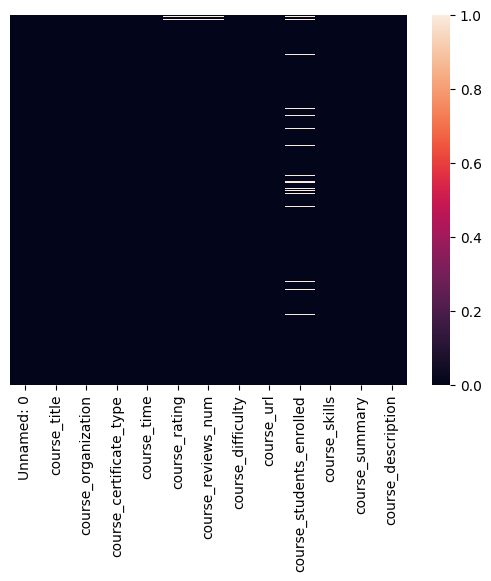

In [11]:
sns.heatmap(data.isnull(),yticklabels= False)
plt.show()

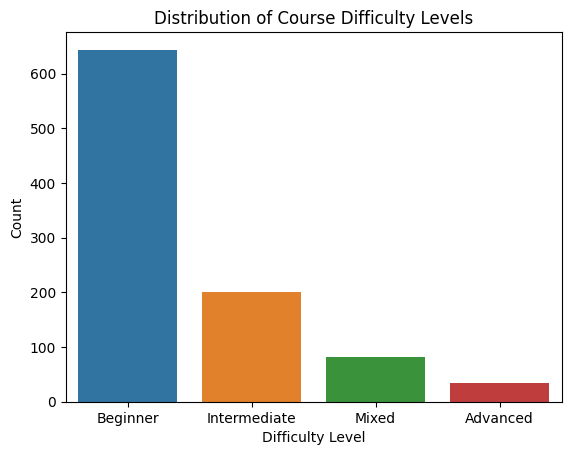

In [18]:
sns.countplot(data=data, x="course_difficulty")
plt.xlabel("Difficulty Level")
plt.ylabel("Count")
plt.title("Distribution of Course Difficulty Levels")
plt.show()

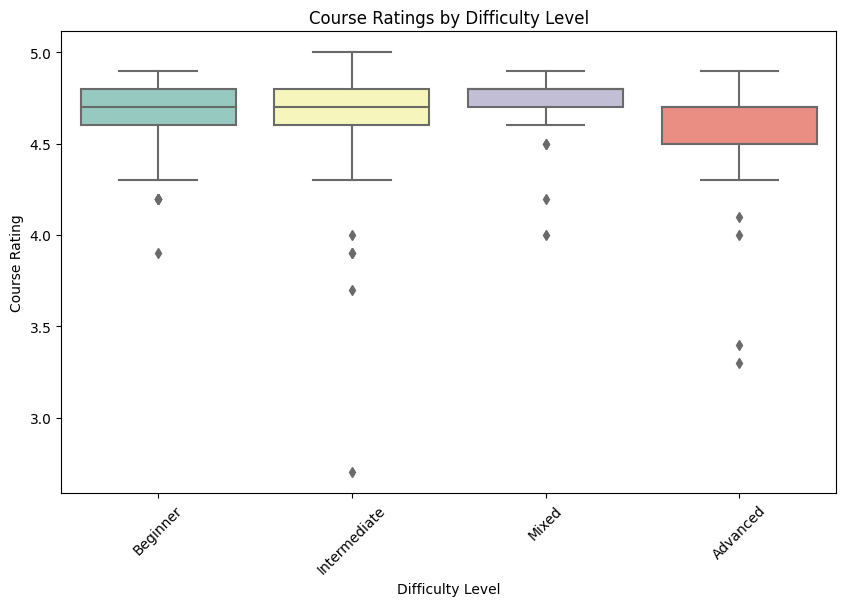

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='course_difficulty', y='course_rating', palette='Set3')
plt.title('Course Ratings by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Course Rating')
plt.xticks(rotation=45)
plt.show()

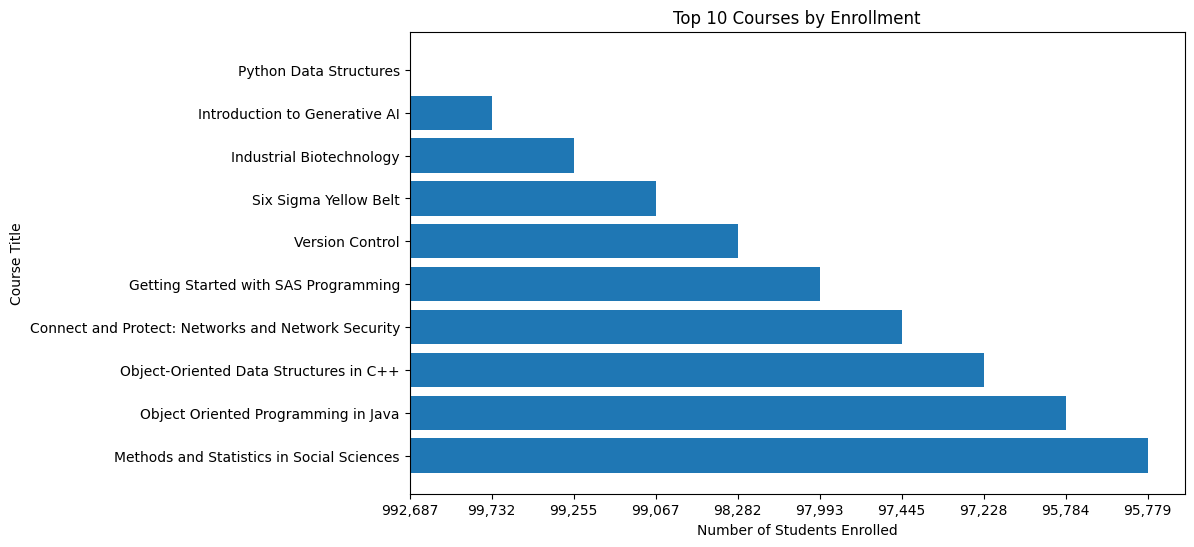

In [25]:
top_courses = data.sort_values(by='course_students_enrolled', ascending=False)

N = 10  
top_N_courses = top_courses.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_N_courses["course_title"], top_N_courses["course_students_enrolled"])
plt.xlabel("Number of Students Enrolled")
plt.ylabel("Course Title")
plt.title(f"Top {N} Courses by Enrollment")
plt.gca().invert_yaxis() 

plt.show()

Top 10 Common Course Organizations:
course_organization
Google                                        91
IBM                                           69
University of Pennsylvania                    53
DeepLearning.AI                               43
University of Illinois at Urbana-Champaign    34
Google Cloud                                  33
University of Michigan                        31
University of Colorado Boulder                31
Johns Hopkins University                      26
Duke University                               24
Name: count, dtype: int64


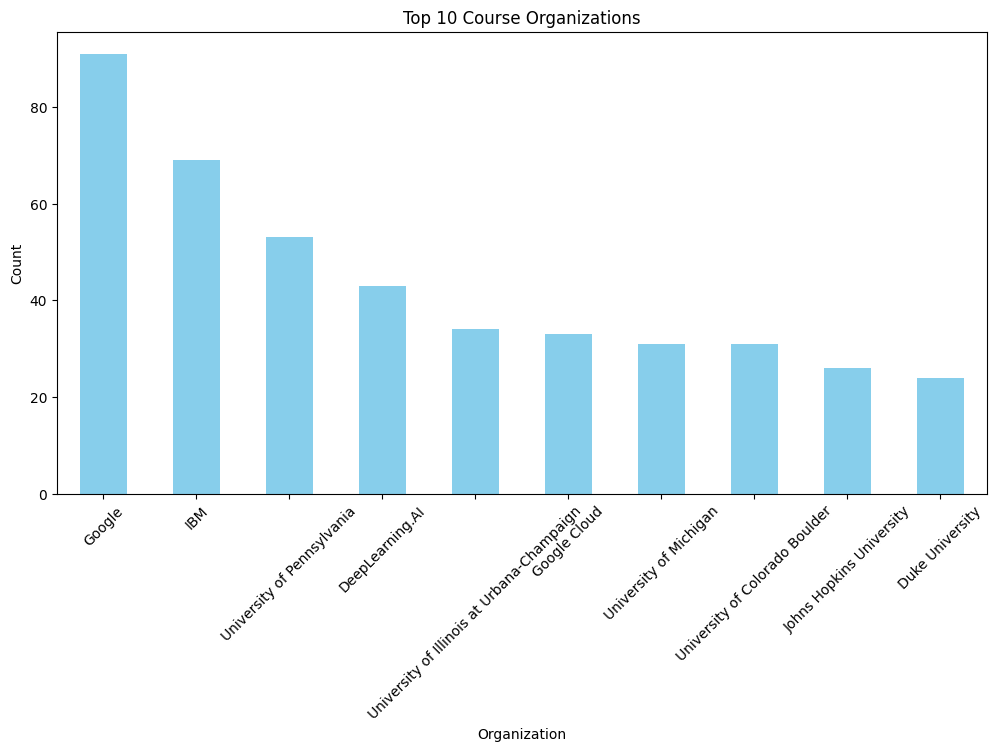

In [26]:
common_organizations = data['course_organization'].value_counts().head(10)
print("Top 10 Common Course Organizations:")
print(common_organizations)

plt.figure(figsize=(12, 6))
common_organizations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Course Organizations')
plt.xlabel('Organization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: >

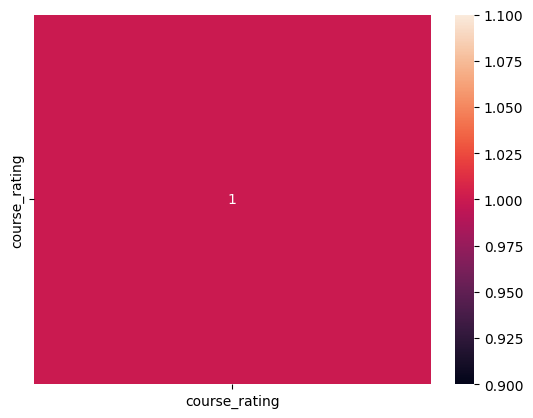

In [40]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [46]:
data['course_reviews_num'] = pd.to_numeric(data['course_reviews_num'], errors='coerce')

data['course_rating'] = pd.to_numeric(data['course_rating'], errors='coerce')

data = data.dropna(subset=['course_reviews_num', 'course_rating'])

In [50]:
string_value = '6,706'
clean_value = string_value.replace(',', '')  # Remove the comma
float_value = float(clean_value)  # Convert to float
print(float_value)  # Output: 6706.0


6706.0


In [51]:
string_values = ['6,706', '8,203', '12,450']
float_values = [float(value.replace(',', '')) for value in string_values]
print(float_values)  # Output: [6706.0, 8203.0, 12450.0]


[6706.0, 8203.0, 12450.0]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


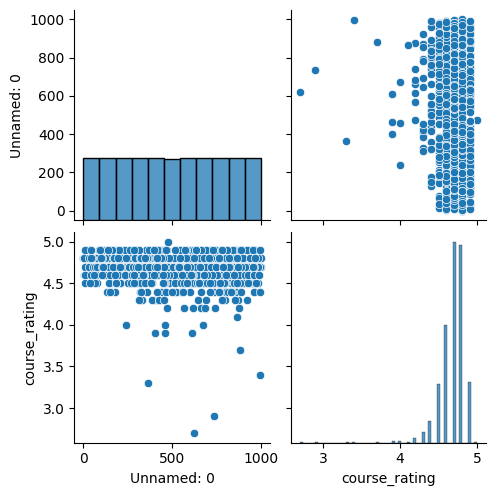

In [3]:
sns.pairplot(data=data)

In [11]:
data.dtypes.sample(10)

course_rating               float64
course_description           object
course_url                   object
course_students_enrolled     object
course_certificate_type      object
course_summary               object
course_time                  object
course_organization          object
course_difficulty            object
course_reviews_num           object
dtype: object

In [13]:
one_hot_encoded_training_predictors = pd.get_dummies(data)

**Clustering**

In [24]:
scaler = StandardScaler()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

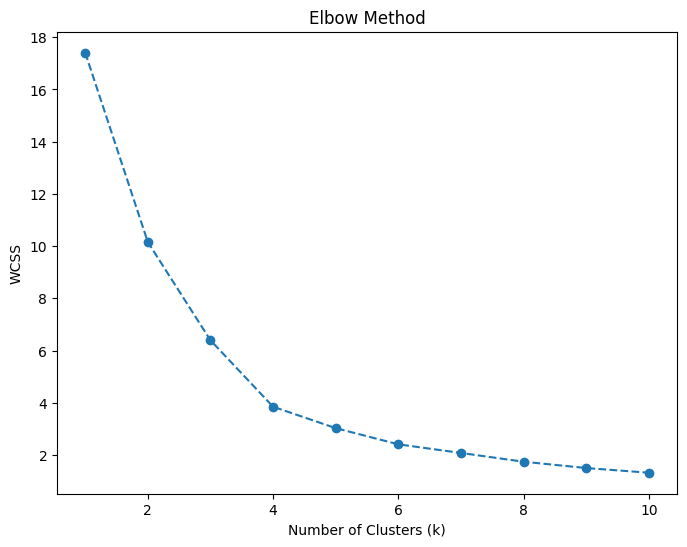

In [38]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)  
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(means, inertias, marker='o', linestyle='--')  
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()


import numpy as np

data = np.random.rand(100, 2)

optimise_k_means(data, max_k=11)


In [41]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data)

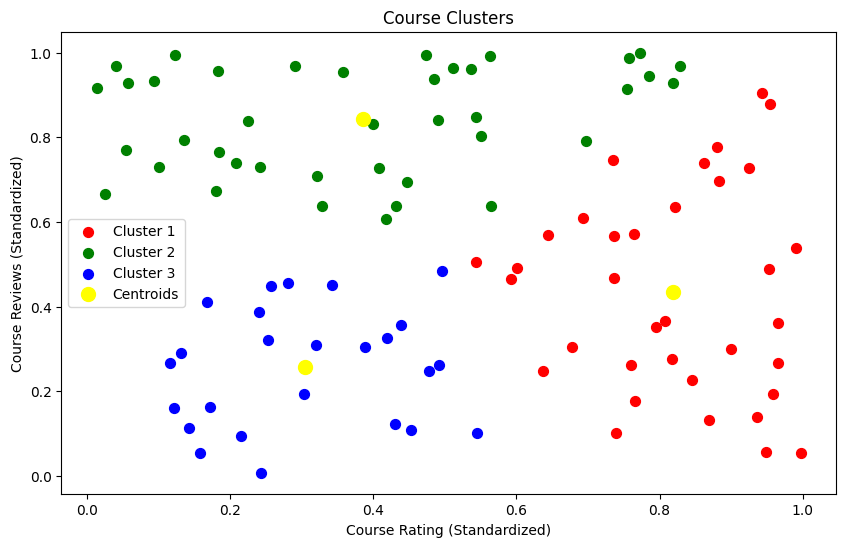

In [44]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(data[cluster_labels == i, 0], data[cluster_labels == i, 1], s=50, c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Course Clusters')
plt.xlabel('Course Rating (Standardized)')
plt.ylabel('Course Reviews (Standardized)')
plt.legend()
plt.show()

**Regression**

In [53]:
data['course_reviews_num'] = pd.to_numeric(data['course_reviews_num'], errors='coerce')
data['course_students_enrolled'] = data['course_students_enrolled'].str.replace(',', '', regex=True).astype(float)

data = data.dropna(subset=['course_rating', 'course_reviews_num', 'course_students_enrolled'])

data = pd.get_dummies(data, columns=['course_difficulty', 'course_certificate_type'], drop_first=True)

X = data[['course_reviews_num', 'course_students_enrolled'] + [col for col in data.columns if 'course_difficulty_' in col or 'course_certificate_type_' in col]]
y = data['course_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0336
R-squared: -0.4461


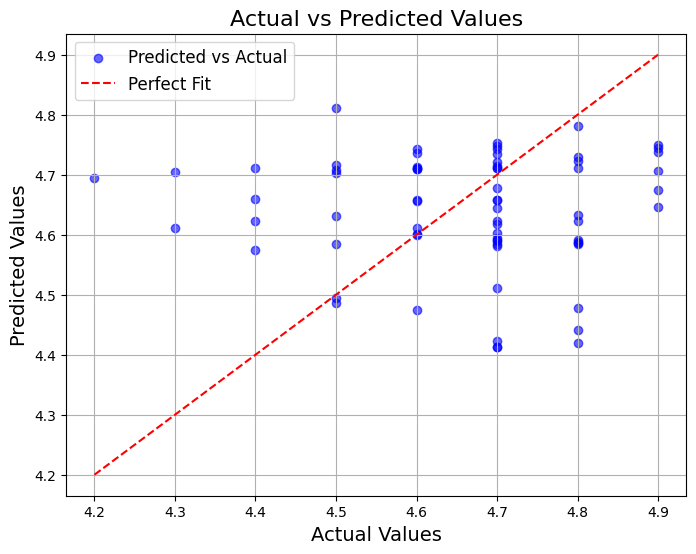

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

perfect_line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Perfect Fit')

plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
